In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

### Data Preparation

In [2]:
df1 = pd.read_csv('datatraining.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)
df2= pd.read_csv('datatest.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)
df3= pd.read_csv('datatest2.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df4= pd.merge(df2, df1, how='outer')
df_m=pd.merge(df4, df3, how='outer')

df = df_m.set_index(['date'])


In [3]:
from data_preparation import prepare_dataset

In [4]:
class_name = 'Occupancy'
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
X = np.zeros(shape=(20,50))

for i in range(20):
    X[i] = np.array(df['CO2'].sample(n=50))
X.shape

(20, 50)

In [6]:
y = np.array([2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2])

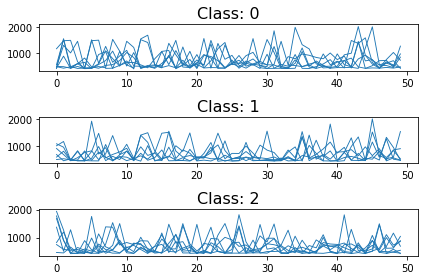

In [7]:
plt.figure()
for i, classe in enumerate([0,1,2]):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()

plt.show()

### Data partitioning

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Shapelets Discovery

In [26]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [27]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 14
ts_sz 50
n_classes 3
shapelet_sizes {5: 3}


In [28]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [29]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
14/14 [==============================] - 0s 18ms/step - loss: 25126.3359 - categorical_accuracy: 0.2857 - categorical_crossentropy: 25126.3027
Epoch 2/200
14/14 [==============================] - 0s 858us/step - loss: 5253591.5000 - categorical_accuracy: 0.3571 - categorical_crossentropy: 5252487.0000
Epoch 3/200
14/14 [==============================] - 0s 143us/step - loss: 8969596.0000 - categorical_accuracy: 0.3571 - categorical_crossentropy: 8968530.0000
Epoch 4/200
14/14 [==============================] - 0s 429us/step - loss: 865746.8125 - categorical_accuracy: 0.3571 - categorical_crossentropy: 865702.3125
Epoch 5/200
14/14 [==============================] - 0s 215us/step - loss: 2032590.5000 - categorical_accuracy: 0.3571 - categorical_crossentropy: 2032325.8750
Epoch 6/200
14/14 [==============================] - 0s 286us/step - loss: 2676579.5000 - categorical_accuracy: 0.2857 - categorical_crossentropy: 2676294.7500
Epoch 7/200
14/14 [============================

Epoch 53/200
14/14 [==============================] - 0s 500us/step - loss: 177528.4531 - categorical_accuracy: 0.6429 - categorical_crossentropy: 176911.7344
Epoch 54/200
14/14 [==============================] - 0s 286us/step - loss: 126698.1641 - categorical_accuracy: 0.7857 - categorical_crossentropy: 126074.6172
Epoch 55/200
14/14 [==============================] - 0s 786us/step - loss: 34957.5273 - categorical_accuracy: 0.8571 - categorical_crossentropy: 34335.6641
Epoch 56/200
14/14 [==============================] - 0s 285us/step - loss: 7568.3203 - categorical_accuracy: 0.9286 - categorical_crossentropy: 6948.1318
Epoch 57/200
14/14 [==============================] - 0s 214us/step - loss: 619.5296 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 58/200
14/14 [==============================] - 0s 214us/step - loss: 619.2819 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 59/200
14/14 [==============================] - 0s 143

Epoch 106/200
14/14 [==============================] - 0s 143us/step - loss: 607.5039 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 107/200
14/14 [==============================] - 0s 1ms/step - loss: 607.2609 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 108/200
14/14 [==============================] - 0s 215us/step - loss: 607.0180 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 109/200
14/14 [==============================] - 0s 857us/step - loss: 606.7753 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 110/200
14/14 [==============================] - 0s 286us/step - loss: 606.5326 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 111/200
14/14 [==============================] - 0s 429us/step - loss: 606.2900 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 112/200
14/14 [==============================] - 0s 285us/st

Epoch 159/200
14/14 [==============================] - 0s 286us/step - loss: 594.7592 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 160/200
14/14 [==============================] - 0s 214us/step - loss: 594.5213 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 161/200
14/14 [==============================] - 0s 571us/step - loss: 594.2836 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 162/200
14/14 [==============================] - 0s 571us/step - loss: 594.0458 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 163/200
14/14 [==============================] - 0s 214us/step - loss: 593.8082 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 164/200
14/14 [==============================] - 0s 357us/step - loss: 593.5707 - categorical_accuracy: 1.0000 - categorical_crossentropy: 0.0000e+00
Epoch 165/200
14/14 [==============================] - 0s 714us/

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={5: 3},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [30]:
y_pred = shp_clf.predict(X_test) #predice una classe per un dato set di time series

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 19ms/step
Accuracy 0.5
F1-score [0.66666667 0.5        0.4       ]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         2
           2       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.61      0.50      0.52         6
weighted avg       0.61      0.50      0.52         6



In [31]:
predicted_locations = shp_clf.locate(X_train) #Compute shapelet match location for a set of time series

14/14 [==============================] - 0s 8ms/step


C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\tslearn\utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 14 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


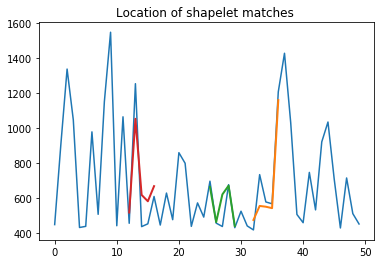

In [32]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Location of shapelet matches "
          .format(n_shapelets))

plt.plot(X_train[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

# Others Shapelet Discovery Methods

1- This implementation views the model as a layered graph, where each layer implements a forward, backword and parameters update methods (see below diagram). This abstraction simplifies thinking about the algorithm and implementing it.

https://github.com/mohaseeb/shaplets-python

In [33]:
from shapelets_lts.classification import LtsShapeletClassifier

In [34]:
shp_clf = LtsShapeletClassifier(
    K=3,
    R=1,
    L_min=10,
    epocs=100,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)

param K: number of shapelets
        
        
param R: scales of shapelet lengths
        
        
param L_min: minimum shapelet length

In [35]:
shp_clf.fit(X_train, y_train)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/100 (iteration=14) loss=nan validation accuracy=0.35714285714285715


C:\Users\Gianmarco\anaconda3\envs\tfk\lib\site-packages\shapelets_lts\network\soft_min_layer.py:67: RuntimeWarning: invalid value encountered in double_scalars
  M = M_numerator / self.psi


epoch=2/100 (iteration=28) loss=nan validation accuracy=0.35714285714285715
epoch=3/100 (iteration=42) loss=nan validation accuracy=0.35714285714285715
epoch=4/100 (iteration=56) loss=nan validation accuracy=0.35714285714285715
epoch=5/100 (iteration=70) loss=nan validation accuracy=0.35714285714285715
epoch=6/100 (iteration=84) loss=nan validation accuracy=0.35714285714285715
epoch=7/100 (iteration=98) loss=nan validation accuracy=0.35714285714285715
epoch=8/100 (iteration=112) loss=nan validation accuracy=0.35714285714285715
epoch=9/100 (iteration=126) loss=nan validation accuracy=0.35714285714285715
epoch=10/100 (iteration=140) loss=nan validation accuracy=0.35714285714285715
epoch=11/100 (iteration=154) loss=nan validation accuracy=0.35714285714285715
epoch=12/100 (iteration=168) loss=nan validation accuracy=0.35714285714285715
epoch=13/100 (iteration=182) loss=nan validation accuracy=0.35714285714285715
epoch=14/100 (iteration=196) loss=nan validation accuracy=0.35714285714285715


LtsShapeletClassifier(K=3, L_min=10, R=1, alpha=-100, epocs=100, eta=0.01,
                      lamda=0.01, plot_loss=False,
                      shapelet_initialization='segments_centroids')

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

Correct classification rate: 0.35


In [22]:
# Non riesco ad ottenere una perdita e quindi non miglioro mai l'accuracy

2- The Shapelet Transform algorithm extracts the most discriminative shapelets from a data set of time series. A shapelet is defined as a subset of consecutive points from a time series. Two criteria are made available: mutual information and F-scores.

In [23]:
from pyts.transformation import ShapeletTransform

In [24]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[8])
st.fit(X_train, y_train)

ShapeletTransform(criterion='mutual_info', n_jobs=None, n_shapelets=3,
                  random_state=None, remove_similar=True, sort=False, verbose=0,
                  window_sizes=[8], window_steps=None)

In [25]:
len(st.shapelets_)

3

In [26]:
st.shapelets_ #The array with the selected shapelets.

array([[1190.        ,  434.5       ,  434.        ,  431.        ,
         510.33333333,  457.5       ,  471.        ,  458.66666667],
       [ 440.        ,  454.        ,  713.        ,  512.        ,
        1021.        ,  436.5       ,  890.        , 1259.25      ],
       [ 711.        ,  447.        ,  527.75      ,  437.66666667,
         900.5       ,  709.5       ,  429.33333333, 1868.33333333]])

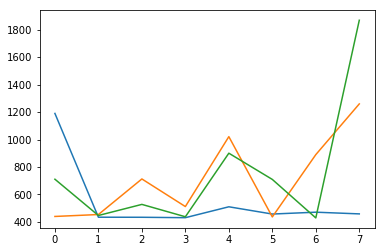

In [27]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

In [28]:
st.indices_ #The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets

array([[ 3,  4, 12],
       [11, 30, 38],
       [13, 12, 20]], dtype=int64)

In [29]:
st.scores_ # The scores associated to the shapelets. The higher, the more discriminant. If criterion='mutual_info', mutual information scores are reported.

array([0.38557078, 0.40189989, 0.40609747])

# Motifs Discovery

MATRIX PROFILE

In [10]:
from matrixprofile import *

In [11]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [12]:
ts = df['CO2']

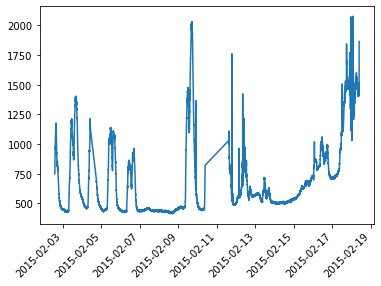

In [13]:
plt.plot(ts)
plt.xticks(rotation=45, ha='right')
plt.show()

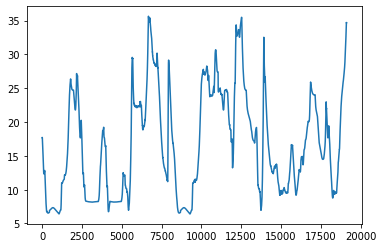

In [14]:
w =60*24 # così facendo ho delle subsequence lunghe circa un giorno
mp_d, mpi_d = matrixProfile.stomp(ts.values, w)
#mp_d è la matrix profile, ossia un array contenente le distanze minime tra ogni subsequence lunga w
#mpi_d è un array contenente gli indici delle suddette subsequence
plt.plot(mp_d)
plt.show()

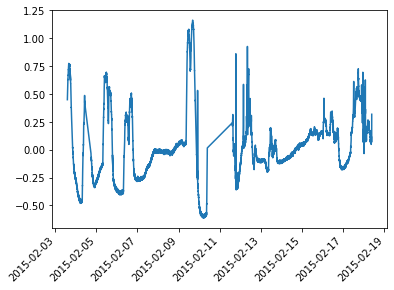

In [15]:
window = 60*24
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.xticks(rotation=45, ha='right')
plt.show()

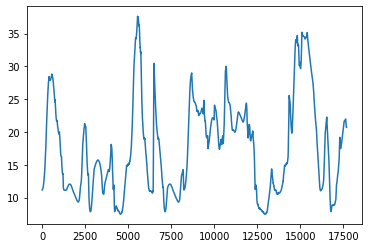

In [16]:
w = 60*24
mp_dt, mpi_dt = matrixProfile.stomp(ts_log_mov_diff.values[w-1:], w)

plt.plot(mp_dt)
plt.show()

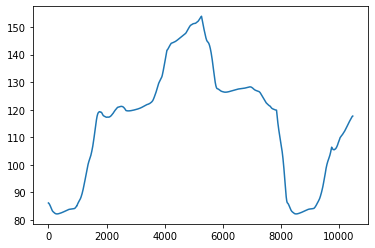

In [17]:
w = 7*24*60 #subsequence settimanali
mp_w, mpi_w = matrixProfile.stomp(ts.values, w)

plt.plot(mp_w)
plt.show()

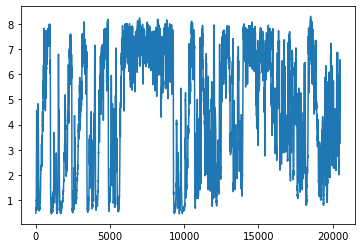

In [18]:
w = 60 #subsequence orarie
mp_h, mpi_h = matrixProfile.stomp(ts.values, w)

plt.plot(mp_h)
plt.show()

MOTIF DISCOVERY

In [19]:
mo_d, mod_d  = motifs.motifs(ts.values, (mp_d, mpi_d), max_motifs=5) # motifs lunghi un giorno
mo_dt, mod_dt  = motifs.motifs(ts.values, (mp_dt, mpi_dt), max_motifs=5) #motifs lunghi un giorno su ts transformata
mo_w, mod_w  = motifs.motifs(ts.values, (mp_w, mpi_w), max_motifs=5) #motifs lunghi una settimana
mo_h, mod_h  = motifs.motifs(ts.values, (mp_h, mpi_h), max_motifs=5) # motifs lunghi circa un giorno

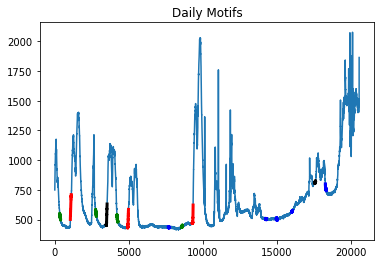

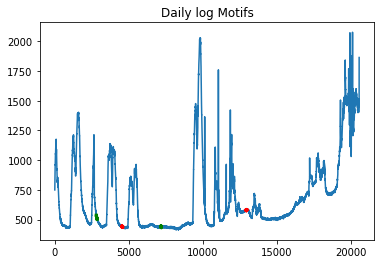

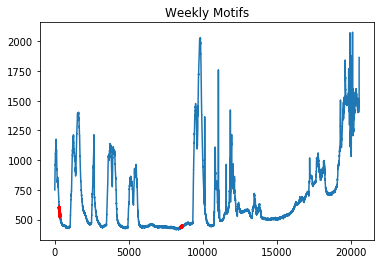

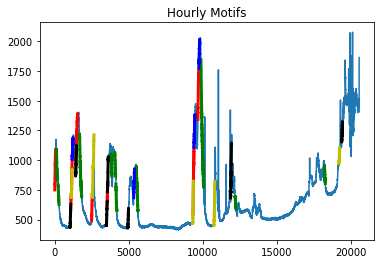

In [20]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_d)]
for m, d, c in zip(mo_d, mod_d, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
plt.title('Daily Motifs')
plt.show()

plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_dt)]
for m, d, c in zip(mo_dt, mod_dt, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
plt.title('Daily log Motifs') 
plt.show()

plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_w)]
for m, d, c in zip(mo_w, mod_w, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
plt.title('Weekly Motifs')
plt.show()

plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_h)]
for m, d, c in zip(mo_h, mod_h, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
plt.title('Hourly Motifs')
plt.show()

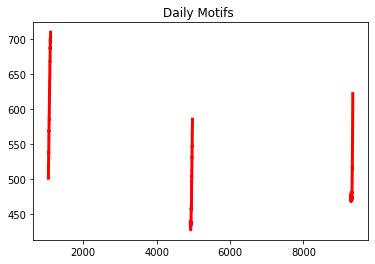

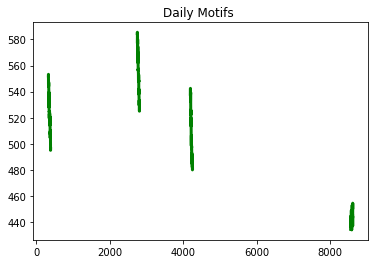

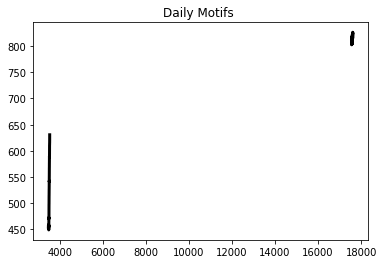

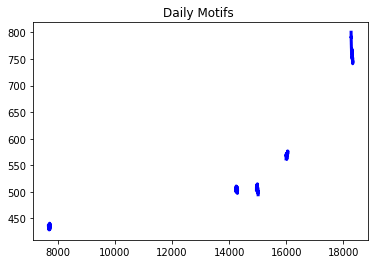

In [21]:
for m, d, c in zip(mo_d, mod_d, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.title('Daily Motifs ')
    plt.show()

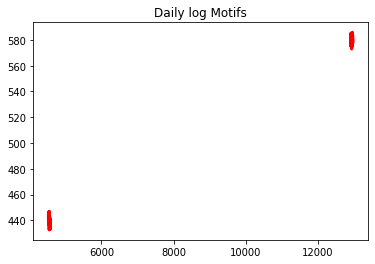

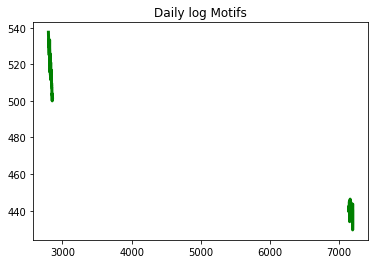

In [33]:
for m, d, c in zip(mo_dt, mod_dt, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.title('Daily log Motifs')
    plt.show()

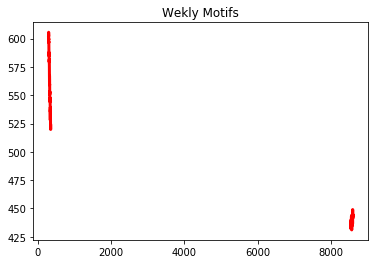

In [35]:
for m, d, c in zip(mo_w, mod_w, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.title('Wekly Motifs')
    plt.show()

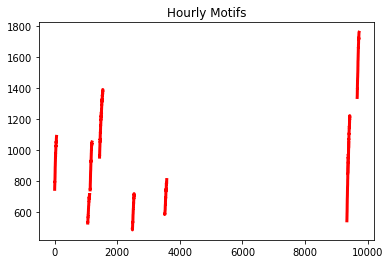

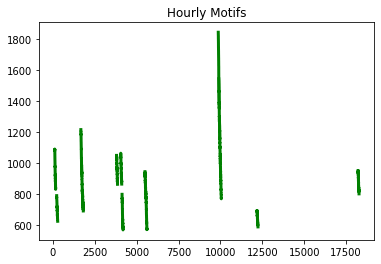

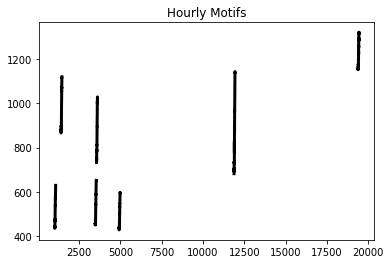

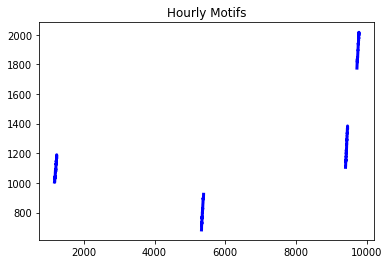

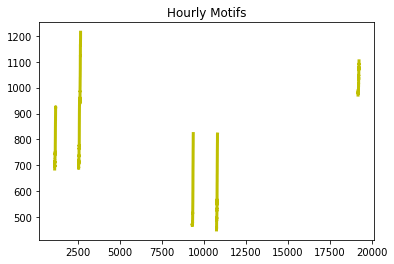

In [36]:
for m, d, c in zip(mo_h, mod_h, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        plt.title('Hourly Motifs')
    plt.show()

## Anomaly Discovery

In [37]:
from matrixprofile.discords import discords

In [38]:
anoms_d = discords(mp_d, ex_zone=3, k=5)
anoms_dt = discords(mp_dt, ex_zone=3, k=5)
anoms_w = discords(mp_w, ex_zone=3, k=5)
anoms_h = discords(mp_h, ex_zone=3, k=5)

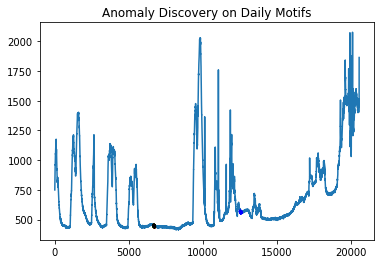

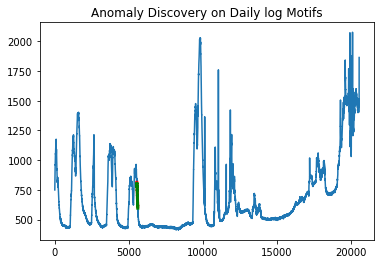

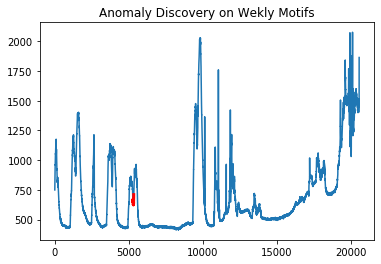

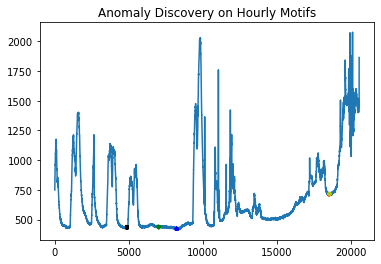

In [41]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_d)]
for a, c in zip(anoms_d, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.title('Anomaly Discovery on Daily Motifs')
plt.show()

plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_dt)]
for a, c in zip(anoms_dt, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.title('Anomaly Discovery on Daily log Motifs')
plt.show()

plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_w)]
for a, c in zip(anoms_w, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.title('Anomaly Discovery on Wekly Motifs')
plt.show()

plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo_h)]
for a, c in zip(anoms_h, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.title('Anomaly Discovery on Hourly Motifs')
plt.show()